# EDA - Exploratory Data Analysis

In [383]:
import re
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import gaussian_kde
import numpy as np

pd.set_option('display.max_columns', None)

In [384]:
df = pd.read_csv('PEDE_PASSOS_DATASET_FIAP.csv', sep=';')
df.head()     

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [385]:
df['PONTO_VIRADA_2021'].value_counts()

PONTO_VIRADA_2021
Não       576
Sim       108
#NULO!      2
Name: count, dtype: int64

In [386]:
df_analysis = df[['NOME', 'PONTO_VIRADA_2021']].isin(['#NULO!'])
df_analysis[df_analysis['PONTO_VIRADA_2021'] == True]
# will remove these in a function later on, with NaN

,NOME,PONTO_VIRADA_2021
70,False,True
505,False,True


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [388]:
indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']

In [389]:
def extract_columns_for_year(dataframe, year):
    regex_pattern = re.compile(f'.*_{year}$')
    columns_for_year = [column for column in dataframe.columns if regex_pattern.match(column) or column == 'NOME']
    filtered_dataframe = dataframe[columns_for_year].copy()
    filtered_dataframe['ANO'] = year
    filtered_dataframe.columns = [re.sub(f'_{year}$', '', column) for column in filtered_dataframe.columns]

    return filtered_dataframe

def clean_dataframe(dataframe):
    # Drop rows where all columns except 'NOME' and 'ANO' are NaN
    temp_df = dataframe.dropna(subset=dataframe.columns.difference(['NOME', 'ANO']), how='all')
    # Remove rows that are entirely NaN
    temp_df = temp_df[~temp_df.isna().all(axis=1)]
    # remove rows where we have #NULO! in any of the columns
    temp_df = temp_df[~temp_df.isin(['#NULO!']).any(axis=1)]
    return temp_df.dropna(subset=['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN'], how='all')

def process_yearly_data(dataframe, year: int) -> pd.DataFrame:
    filtered_dataframe = extract_columns_for_year(dataframe, year)
    year_specific_df = filtered_dataframe.query('ANO == @year')

    # Convert indicator columns to numeric, forcing errors to NaN
    indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']
    year_specific_df[indicadores] = year_specific_df[indicadores].apply(lambda column: pd.to_numeric(column, errors='coerce'))

    # Generate a cleaned version of the dataframe without NaNs
    cleaned_year_df = clean_dataframe(year_specific_df)
    
    return cleaned_year_df

In [390]:
# quebra o df original por ano
df_2020_cleaned = process_yearly_data(df, 2020)
df_2021_cleaned = process_yearly_data(df, 2021)
df_2022_cleaned = process_yearly_data(df, 2022)

In [391]:
df_2020_cleaned

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.937500,7.750000,10.0,2020
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.125000,8.111113,10.0,2020
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.187500,7.750000,5.0,2020
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.437500,8.166665,10.0,2020
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.750000,8.944450,10.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,Rede Decisão/União,ALUNO-1341,17,1,7B,Sim,8.430003,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.75001,8.9,6.875,7.166667,8.125000,9.208343,10.0,2020
1342,Escola Pública,ALUNO-1343,11,2,2M,Não,5.841667,D,Quartzo,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.00002,8.0,5.000,0.000000,6.250000,6.583325,10.0,2020
1343,Escola Pública,ALUNO-1344,14,2,1R,Não,6.449445,C,Ágata,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,7.4,5.625,6.000000,6.458333,7.555550,2.5,2020
1346,Escola Pública,ALUNO-1347,17,1,7B,Não,7.158543,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,9.16668,8.1,6.875,4.666667,7.343750,6.333335,10.0,2020


In [392]:
df_2020_cleaned['PEDRA'].value_counts()

PEDRA
Ametista    336
Ágata       171
Quartzo     128
Topázio      92
Name: count, dtype: int64

In [393]:
# just to make sure :P
df_2020_cleaned['ANO'].value_counts()

ANO
2020    727
Name: count, dtype: int64

In [394]:
df_2020_cleaned['INSTITUICAO_ENSINO_ALUNO'].value_counts()

INSTITUICAO_ENSINO_ALUNO
Escola Pública          598
Rede Decisão/União      101
FIAP                     11
UNISA                    10
Estácio                   3
Einstein                  2
Escola João Paulo II      2
Name: count, dtype: int64

# Graph plots

In [395]:

def plot_bar(df, col, titulo, xaxis, yaxis='Qty'):
  grupos = df[col].value_counts()

  fig = go.Figure(
      go.Bar(
          x=grupos.index,
          y=grupos,
          text=grupos,
          textposition='auto'
      )
  )

  fig.update_layout(
      title=titulo,
      xaxis=dict(tickmode='linear'),
      xaxis_title=xaxis,
      yaxis_title=yaxis,
  )

  fig.show()
  
def plot_histograma(df, col, titulo, rug=True):
  # faz o cálculo do KDE com o scipy
  data = df[col].values
  kde = gaussian_kde(data)
  x_vals = np.linspace(min(data), max(data), 1000)
  kde_vals = kde(x_vals)

  # faz o cálculo da quantidade ótima de bins (assim evitamos agrupamentos desnecessários)
  bins = len(np.histogram_bin_edges(data, bins='auto'))

  # cria os plots separados (histograma + kde + rug)
  # 1. histograma
  histogram = go.Histogram(x=data, nbinsx=bins, histnorm='probability density', name=f'Density: {col}')

  # 2. kde
  kde_line = go.Scatter(x=x_vals, y=kde_vals, mode='lines', name='Curve (KDE)', line=dict(color='red'))

  # 3. rug, mas apenas se ele tiver sido requisitado
  if rug:
    rug_plot = go.Scatter(
        x=data,
        y=[-0.01] * len(data),
        mode='markers',
        name='Obs',
        marker=dict(color='black', symbol='line-ns-open', size=10)
    )

  # figura principal
  fig = go.Figure()
  fig.add_trace(histogram)
  fig.add_trace(kde_line)
  fig.update_traces(texttemplate='%{y:.2%}', textposition='outside', selector=dict(type='histogram'))

  # configs
  fig.update_layout(
      title=titulo,
      xaxis_title='Value',
      yaxis_title='Frequency',
      yaxis=dict(range=[0, max(kde_vals) + 0.1]),
      bargap=0.015,
      uniformtext_mode='hide'
  )

  # configs com rug
  if rug:
    fig.add_trace(rug_plot)
    fig.update_layout(yaxis=dict(range=[-0.02, max(kde_vals) + 0.1]))
  # configs sem rug
  else:
    fig.update_layout(xaxis=dict(tickmode='linear'))

  fig.show()
  

def plot_boxplot(df, col, titulo):
  fig = px.box(y=df[col], points="all", title=titulo)

  fig.update_layout(
      yaxis_title='Valor'
  )

  fig.update_yaxes(dtick=1)

  fig.show()
     


def plot_boxplot_comparativo(df, col):
  fig = px.box(data_frame=df, x='ANO', y=col, points="all", title=f'Distribuição do {col} comparativa', color='ANO')

  fig.update_layout(
      yaxis_title='Valor'
  )

  fig.update_yaxes(dtick=1)

  fig.show()

In [396]:
plot_bar(df_2020_cleaned, 'INSTITUICAO_ENSINO_ALUNO', 'Education Institutions in 2020', xaxis='Education Ins.')

In [397]:
plot_bar(df_2021_cleaned, 'INSTITUICAO_ENSINO_ALUNO', 'Education Institutions in 2021', xaxis='Education Ins.')

In [398]:
plot_histograma(df_2020_cleaned, 'INDE', 2020)

In [399]:
plot_histograma(df_2021_cleaned.dropna(), 'INDE', 2021)

In [400]:
plot_histograma(df_2022_cleaned, 'INDE', 2022)

# Preparing model for Machine Learning

In [401]:
df_2022_cleaned

,NOME,FASE,TURMA,ANO_INGRESSO,BOLSISTA,INDE,CG,CF,CT,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,IPP,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA,PONTO_VIRADA,IPV,IAN,NIVEL_IDEAL,ANO
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),2022
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),2022
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),2022
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.500,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano),2022
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.500,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano),2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,ALUNO-1342,2.0,K,2022.0,Não,8.150001,99.0,13.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.500,7.750000,6.000000,9.500000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano),2022
1342,ALUNO-1343,2.0,K,2018.0,Não,5.674644,763.0,141.0,11.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.41668,6.470435,6.250,2.000000,2.000000,2.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.444443,5.0,Fase 4 (9º ano),2022
1345,ALUNO-1346,0.0,U,2022.0,Não,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,9.166667,8.833333,NaN,2.0,5.625000,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano),2022
1347,ALUNO-1348,4.0,P,2018.0,Sim,6.749981,567.0,51.0,6.0,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,4.666667,7.166667,5.866667,4.0,6.718750,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.833328,5.0,Fase 5 (1º EM),2022


In [402]:
df_2022_cleaned.INDICADO_BOLSA

1       Sim
3       Não
4       Não
5       Não
6       Não
       ... 
1341    Não
1342    Não
1345    Não
1347    Não
1348    Sim
Name: INDICADO_BOLSA, Length: 862, dtype: object

In [403]:
df_2022_cleaned['INDICADO_BOLSA'].value_counts()

INDICADO_BOLSA
Não    730
Sim    132
Name: count, dtype: int64

In [404]:
df_bolsa_predict = df_2022_cleaned[['IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN', 'INDE', 'INDICADO_BOLSA']]
df_bolsa_predict

,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,INDICADO_BOLSA
1,10.00002,7.581705,7.500,8.816667,5.625000,7.916665,5.0,7.675509,Sim
3,10.00002,8.071429,7.500,5.083333,6.250000,8.055553,5.0,7.117065,Não
4,6.41668,8.557505,7.500,7.083333,6.458333,7.833337,5.0,7.232336,Não
5,9.00002,9.333333,7.500,5.500000,6.250000,7.500000,10.0,7.741669,Não
6,10.00002,9.314954,7.500,5.583333,5.937500,7.916670,5.0,7.406743,Não
...,...,...,...,...,...,...,...,...,...
1341,7.91668,9.666667,7.500,7.750000,6.250000,7.500000,10.0,8.150001,Não
1342,7.41668,6.470435,6.250,2.000000,6.250000,7.444443,5.0,5.674644,Não
1345,9.00002,9.031839,7.500,9.000000,5.625000,9.083340,5.0,8.135538,Não
1347,8.33334,9.178030,5.625,5.900000,6.718750,5.833328,5.0,6.749981,Não


In [405]:
label_encoder = LabelEncoder()
df_bolsa_predict['INDICADO_BOLSA'] = label_encoder.fit_transform(df_bolsa_predict['INDICADO_BOLSA'])
df_bolsa_predict

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_30694/1436043990.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,INDICADO_BOLSA
1,10.00002,7.581705,7.500,8.816667,5.625000,7.916665,5.0,7.675509,1
3,10.00002,8.071429,7.500,5.083333,6.250000,8.055553,5.0,7.117065,0
4,6.41668,8.557505,7.500,7.083333,6.458333,7.833337,5.0,7.232336,0
5,9.00002,9.333333,7.500,5.500000,6.250000,7.500000,10.0,7.741669,0
6,10.00002,9.314954,7.500,5.583333,5.937500,7.916670,5.0,7.406743,0
...,...,...,...,...,...,...,...,...,...
1341,7.91668,9.666667,7.500,7.750000,6.250000,7.500000,10.0,8.150001,0
1342,7.41668,6.470435,6.250,2.000000,6.250000,7.444443,5.0,5.674644,0
1345,9.00002,9.031839,7.500,9.000000,5.625000,9.083340,5.0,8.135538,0
1347,8.33334,9.178030,5.625,5.900000,6.718750,5.833328,5.0,6.749981,0


## Data explanation

- IAA: Indicador de Auto Avaliça o – Media das Notas de Auto-Avaliação do Aluno
- IEG: Indicador de Engajamento – Media das Notas de Engajamento do Aluno
- IPS: Indicador Psicosocial – Media das Notas de Psicosocial do Aluno
- IDA: Indicador de Aprendizagem
- IPP: Indicador Psico Pedagógico
- IPV: Indicador de Ponto de Virada
- IAN: Indicador de Adequação de Nível
- INDE: Indice de desenvolvimento Educacional 
- PONTO VIRADA: Indica se o aluno atingiu o ponto de virada (passou de ano)

In [406]:
df_all = pd.concat([df_2020_cleaned, df_2021_cleaned, df_2022_cleaned])
df_ponto_virada_to_predict = df_all[['IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN', 'INDE', 'PONTO_VIRADA']]
df_ponto_virada_to_predict.dropna(inplace=True)
df_ponto_virada_to_predict


/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_30694/3420586696.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,PONTO_VIRADA
0,8.50002,8.700000,7.500,7.000000,5.93750,7.750000,10.0,7.883752,Não
2,7.91667,8.900000,7.500,5.500000,8.12500,8.111113,10.0,7.856390,Não
3,8.00002,4.100000,6.875,0.000000,7.18750,7.750000,5.0,5.076252,Não
4,7.50002,8.000000,7.500,7.500000,8.43750,8.166665,10.0,8.077085,Não
7,8.33334,9.900000,4.375,7.333333,8.75000,8.944450,10.0,8.381391,Sim
...,...,...,...,...,...,...,...,...,...
1341,7.91668,9.666667,7.500,7.750000,6.25000,7.500000,10.0,8.150001,Não
1342,7.41668,6.470435,6.250,2.000000,6.25000,7.444443,5.0,5.674644,Não
1345,9.00002,9.031839,7.500,9.000000,5.62500,9.083340,5.0,8.135538,Sim
1347,8.33334,9.178030,5.625,5.900000,6.71875,5.833328,5.0,6.749981,Não


In [407]:
label_encoder = LabelEncoder()
df_ponto_virada_to_predict['PONTO_VIRADA'] = label_encoder.fit_transform(df_ponto_virada_to_predict['PONTO_VIRADA'])
df_ponto_virada_to_predict

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_30694/951116109.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,PONTO_VIRADA
0,8.50002,8.700000,7.500,7.000000,5.93750,7.750000,10.0,7.883752,0
2,7.91667,8.900000,7.500,5.500000,8.12500,8.111113,10.0,7.856390,0
3,8.00002,4.100000,6.875,0.000000,7.18750,7.750000,5.0,5.076252,0
4,7.50002,8.000000,7.500,7.500000,8.43750,8.166665,10.0,8.077085,0
7,8.33334,9.900000,4.375,7.333333,8.75000,8.944450,10.0,8.381391,1
...,...,...,...,...,...,...,...,...,...
1341,7.91668,9.666667,7.500,7.750000,6.25000,7.500000,10.0,8.150001,0
1342,7.41668,6.470435,6.250,2.000000,6.25000,7.444443,5.0,5.674644,0
1345,9.00002,9.031839,7.500,9.000000,5.62500,9.083340,5.0,8.135538,1
1347,8.33334,9.178030,5.625,5.900000,6.71875,5.833328,5.0,6.749981,0


In [408]:
df_ponto_virada_to_predict.PONTO_VIRADA.value_counts()

PONTO_VIRADA
0    1932
1     315
Name: count, dtype: int64

In [409]:
df_bolsa_predict.to_csv('output/df_bolsa_predict.csv', sep=',', index=False)
df_ponto_virada_to_predict.to_csv('output/df_ponto_virada_to_predict.csv', sep=',', index=False)

In [410]:
df_ponto_virada_to_predict.PONTO_VIRADA.value_counts()

PONTO_VIRADA
0    1932
1     315
Name: count, dtype: int64

In [411]:
df_ponto_virada_to_predict

,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,PONTO_VIRADA
0,8.50002,8.700000,7.500,7.000000,5.93750,7.750000,10.0,7.883752,0
2,7.91667,8.900000,7.500,5.500000,8.12500,8.111113,10.0,7.856390,0
3,8.00002,4.100000,6.875,0.000000,7.18750,7.750000,5.0,5.076252,0
4,7.50002,8.000000,7.500,7.500000,8.43750,8.166665,10.0,8.077085,0
7,8.33334,9.900000,4.375,7.333333,8.75000,8.944450,10.0,8.381391,1
...,...,...,...,...,...,...,...,...,...
1341,7.91668,9.666667,7.500,7.750000,6.25000,7.500000,10.0,8.150001,0
1342,7.41668,6.470435,6.250,2.000000,6.25000,7.444443,5.0,5.674644,0
1345,9.00002,9.031839,7.500,9.000000,5.62500,9.083340,5.0,8.135538,1
1347,8.33334,9.178030,5.625,5.900000,6.71875,5.833328,5.0,6.749981,0


In [412]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = df_ponto_virada_to_predict.drop('PONTO_VIRADA', axis=1)
Y = df_ponto_virada_to_predict['PONTO_VIRADA']

# Convert categorical features to numeric using one-hot encoding, if needed
X = pd.get_dummies(X)

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Ensure X and Y are numpy arrays
X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

# Verify shape and type of the arrays after conversion
print(f"X shape: {X.shape}, X dtype: {X.dtype}")
print(f"Y shape: {Y.shape}, Y dtype: {Y.dtype}")
print("Sample of X data:\n", X[:5])
print("Sample of Y data:\n", Y[:5])

# Check for any remaining non-numeric or NaN values
assert np.issubdtype(X.dtype, np.number), "X contains non-numeric values."
assert not np.isnan(X).any(), "X contains NaN values."
assert np.issubdtype(Y.dtype, np.number), "Y contains non-numeric values."
assert not np.isnan(Y).any(), "Y contains NaN values."


# Check for any non-numeric or NaN values
print(f"X dtype: {X.dtype}, Y dtype: {Y.dtype}")
print(f"Any NaN in X: {np.isnan(X).any()}, Any NaN in Y: {np.isnan(Y).any()}")

X

X shape: (2247, 8), X dtype: float32
Y shape: (2247,), Y dtype: float32
Sample of X data:
 [[0.8500003  0.87       0.75       0.7        0.59375    0.6999991
  1.         0.747567  ]
 [0.79166543 0.89       0.75       0.55       0.8125     0.7481474
  1.         0.74379003]
 [0.8000004  0.41       0.6875     0.         0.71875    0.6999991
  0.33333334 0.3600318 ]
 [0.7500005  0.8        0.75       0.75       0.84375    0.7555543
  1.         0.77425385]
 [0.83333236 0.99       0.4375     0.73333335 0.875      0.85925883
  1.         0.81625885]]
Sample of Y data:
 [0. 0. 0. 0. 1.]
X dtype: float32, Y dtype: float32
Any NaN in X: False, Any NaN in Y: False


array([[0.8500003 , 0.87      , 0.75      , ..., 0.6999991 , 1.        ,
        0.747567  ],
       [0.79166543, 0.89      , 0.75      , ..., 0.7481474 , 1.        ,
        0.74379003],
       [0.8000004 , 0.41      , 0.6875    , ..., 0.6999991 , 0.33333334,
        0.3600318 ],
       ...,
       [0.9000002 , 0.9031839 , 0.75      , ..., 0.8777775 , 0.33333334,
        0.7823224 ],
       [0.83333236, 0.91780305, 0.5625    , ..., 0.44444308, 0.33333334,
        0.59106606],
       [0.79166543, 0.7540114 , 0.75      , ..., 0.46666506, 0.33333334,
        0.5427132 ]], dtype=float32)

In [413]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
type(X_test)

numpy.ndarray

In [414]:
X_test.dtype

dtype('float32')

In [415]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

accuracy, report

(0.9822222222222222,
 '              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99       581\n         1.0       0.94      0.94      0.94        94\n\n    accuracy                           0.98       675\n   macro avg       0.96      0.96      0.96       675\nweighted avg       0.98      0.98      0.98       675\n')

# Testing with mocked data

In [416]:
# get row where student passed
df_ponto_virada_to_predict.query('PONTO_VIRADA == 1')

,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,PONTO_VIRADA
7,8.33334,9.900000,4.375,7.333333,8.750000,8.944450,10.0,8.381391,1
10,9.00002,10.000000,8.125,10.000000,10.000000,10.000010,10.0,9.712504,1
27,9.58335,9.600000,6.875,9.000000,10.000000,9.944453,10.0,9.354726,1
54,0.00000,9.000000,7.500,6.333333,8.281250,8.666667,5.0,6.878125,1
74,10.00002,10.000000,10.000,9.000000,9.375000,9.750010,10.0,9.687504,1
...,...,...,...,...,...,...,...,...,...
1218,6.66666,8.369048,7.500,8.055556,6.041667,8.500005,10.0,8.005754,1
1291,10.00002,9.373638,8.750,7.155556,8.593750,8.500003,10.0,8.740216,1
1332,9.00002,9.629630,7.500,6.500000,6.041667,8.500000,10.0,8.180095,1
1333,9.50002,10.000000,7.500,9.333333,6.041667,9.000007,10.0,8.970837,1


In [417]:
import numpy as np

# Create mock data with the same feature names as the original data
mock_data = pd.DataFrame({
    'IAA': [8.33],
    'IEG': [9.9],
    'IPS': [4.375],
    'IDA': [7.333],
    'IPP': [8.75],
    'IPV': [8.95],
    'IAN': [10.0],
    'INDE': [8.38]
})

# Preprocess the mock data using the scaler
mock_data_scaled = scaler.transform(mock_data)

# Predict using the loaded model
mock_prediction = model.predict(mock_data_scaled)

if mock_prediction[0] == 1:
    print("The student is predicted to pass the year.")
else:
    print("The student is predicted to fail the year.")

The student is predicted to pass the year.


In [418]:
import joblib

# Save the model
joblib.dump(model, 'model/random_forest_ponto_virada_model.pkl')
joblib.dump(scaler, 'model/random_forest_ponto_virada_scaler.pkl')


['model/random_forest_ponto_virada_scaler.pkl']

### Predicting if a student will be awarded a scholarship

In [419]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [420]:
df_awarded_scholarship = pd.read_csv('./output/df_bolsa_predict.csv')
df_awarded_scholarship.head()

,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,INDICADO_BOLSA
0,10.00002,7.581705,7.5,8.816667,5.625000,7.916665,5.0,7.675509,1
1,10.00002,8.071429,7.5,5.083333,6.250000,8.055553,5.0,7.117065,0
2,6.41668,8.557505,7.5,7.083333,6.458333,7.833337,5.0,7.232336,0
3,9.00002,9.333333,7.5,5.500000,6.250000,7.500000,10.0,7.741669,0
4,10.00002,9.314954,7.5,5.583333,5.937500,7.916670,5.0,7.406743,0


In [421]:
columns = df_awarded_scholarship.columns.difference(['INDICADO_BOLSA'])
good_grades = np.random.uniform(8, 10, size=(200, len(columns)))
good_grades = pd.DataFrame(good_grades, columns=columns)
good_grades['INDICADO_BOLSA'] = 1
good_grades.head()

,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV,INDICADO_BOLSA
0,8.057173,8.339566,8.710891,9.473922,9.524549,9.384415,8.473350,9.137902,1
1,9.573765,9.568722,9.405401,9.073544,8.340569,9.807100,8.847551,9.663265,1
2,8.275173,9.111269,9.105058,8.635505,9.368100,9.961555,8.857531,9.356764,1
3,8.262432,8.283649,8.048038,9.152614,8.980681,8.135090,9.840533,9.140239,1
4,8.846606,9.934788,8.030172,8.957968,8.605489,8.321684,9.926000,8.267621,1


In [422]:
bad_grades = np.random.uniform(0, 5, size=(400, len(columns)))
bad_grades = pd.DataFrame(bad_grades, columns=columns)
bad_grades['INDICADO_BOLSA'] = 0
bad_grades

,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV,INDICADO_BOLSA
0,0.772173,3.288086,3.920191,0.926988,2.534844,4.020391,1.606748,4.093959,0
1,1.875749,1.935900,3.263767,4.759695,2.303133,0.335663,2.370315,2.502700,0
2,0.535283,1.146923,0.016445,0.138179,0.737552,0.219788,2.632958,1.767246,0
3,1.425359,1.878492,1.937022,2.328667,4.951779,1.805022,0.212494,4.370585,0
4,3.863556,2.752073,4.851642,4.946857,3.310542,0.307547,3.819446,3.493651,0
...,...,...,...,...,...,...,...,...,...
395,2.668302,1.288912,0.179875,2.300038,3.338027,1.335247,4.949930,2.302973,0
396,3.309050,1.146079,4.753339,3.867270,1.149027,4.289325,0.968986,3.940284,0
397,1.130823,1.333266,4.240442,1.184609,3.541905,0.847130,4.340000,2.521519,0
398,3.059074,4.773486,4.682038,0.069232,1.886467,0.611962,1.595485,3.304307,0


In [423]:
df_awarded_scholarship_final = pd.concat([df_awarded_scholarship, good_grades, bad_grades], ignore_index=True)

df_awarded_scholarship_final

,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,INDICADO_BOLSA
0,10.000020,7.581705,7.500000,8.816667,5.625000,7.916665,5.000000,7.675509,1
1,10.000020,8.071429,7.500000,5.083333,6.250000,8.055553,5.000000,7.117065,0
2,6.416680,8.557505,7.500000,7.083333,6.458333,7.833337,5.000000,7.232336,0
3,9.000020,9.333333,7.500000,5.500000,6.250000,7.500000,10.000000,7.741669,0
4,10.000020,9.314954,7.500000,5.583333,5.937500,7.916670,5.000000,7.406743,0
...,...,...,...,...,...,...,...,...,...
1457,2.668302,2.300038,4.949930,0.179875,1.335247,2.302973,1.288912,3.338027,0
1458,3.309050,3.867270,0.968986,4.753339,4.289325,3.940284,1.146079,1.149027,0
1459,1.130823,1.184609,4.340000,4.240442,0.847130,2.521519,1.333266,3.541905,0
1460,3.059074,0.069232,1.595485,4.682038,0.611962,3.304307,4.773486,1.886467,0


In [424]:
print(df_awarded_scholarship_final['INDICADO_BOLSA'].value_counts())

INDICADO_BOLSA
0    1130
1     332
Name: count, dtype: int64


### Data Preparation:

Split the data into features (X) and target (y).
Normalize the features to ensure that all the input data has a similar scale.
Split the data into training and testing sets.

### Handling Imbalance:

Use techniques like oversampling (e.g., SMOTE) or adjusting class weights during model training.

### Model Creation:

Build a neural network using a library like TensorFlow/Keras.
Define the input layer, hidden layers, and output layer.
Use an appropriate activation function for the output layer (e.g., sigmoid for binary classification).

### Model Training:

Compile the model using an optimizer (e.g., Adam) and a suitable loss function (e.g., binary crossentropy).
Train the model on the training data.

### Model Evaluation:

Evaluate the model's performance on the test set using metrics like accuracy, precision, recall, and the ROC-AUC score.

In [425]:
# features
X = df_awarded_scholarship_final[df_awarded_scholarship_final.columns.difference(['INDICADO_BOLSA'])]
# targets
y = df_awarded_scholarship_final['INDICADO_BOLSA']

In [426]:
X.size

11696

In [427]:
# Step 2: Handling Imbalance using SMOTE
# smote = SMOTE(random_state=37)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [428]:
# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [429]:
X_train.size

9352

In [430]:
y_test.value_counts()

INDICADO_BOLSA
0    226
1     67
Name: count, dtype: int64

In [431]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [432]:
X_train.shape


(1169, 8)

In [433]:
X_test.shape


(293, 8)

In [434]:
from tensorflow.keras.callbacks import EarlyStopping

# Reshape y_train and y_test for binary classification
y_train = np.asarray(y_train).reshape((-1, 1))
y_test = np.asarray(y_test).reshape((-1, 1))

# Define input and output shapes
input_shape = X_train.shape[1]    # Variáveis de entrada
output_shape = y_train.shape[1]   # Classe preditora
batch_size = 32

# Step 3: Model Creation with Input layer
model = Sequential([
    Dense(batch_size, input_shape=(input_shape,),activation='relu'),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(output_shape, activation='sigmoid')
])

# Step 4: Model Training
epoch = 2000
learning_rate = 0.00002
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs=epoch, shuffle=True, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping],  verbose=0)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate metrics
classification_rep = classification_report(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred)

classification_rep, conf_matrix, roc_auc

/Users/tupizz/Downloads/base-dados-brutos-e-scripts-passos-magicos (1)/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1376: early stopping
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


('              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94       226\n           1       0.91      0.64      0.75        67\n\n    accuracy                           0.90       293\n   macro avg       0.91      0.81      0.85       293\nweighted avg       0.91      0.90      0.90       293\n',
 array([[222,   4],
        [ 24,  43]]),
 0.9659886408664641)

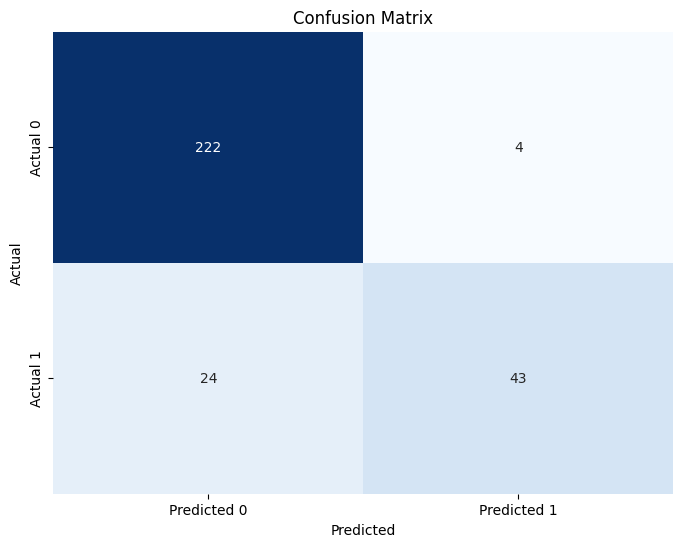

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [436]:
model_training_data_hist = pd.DataFrame(history.history)
model_training_data_hist

,accuracy,loss,val_accuracy,val_loss
0,0.596236,0.664752,0.645051,0.608079
1,0.599658,0.657934,0.655290,0.602320
2,0.641574,0.639419,0.662116,0.596833
3,0.638152,0.630652,0.672355,0.591393
4,0.647562,0.619126,0.692833,0.586014
...,...,...,...,...
1371,0.897348,0.251688,0.904437,0.204228
1372,0.894782,0.240417,0.904437,0.204286
1373,0.896493,0.245964,0.904437,0.204221
1374,0.887938,0.257958,0.904437,0.204226


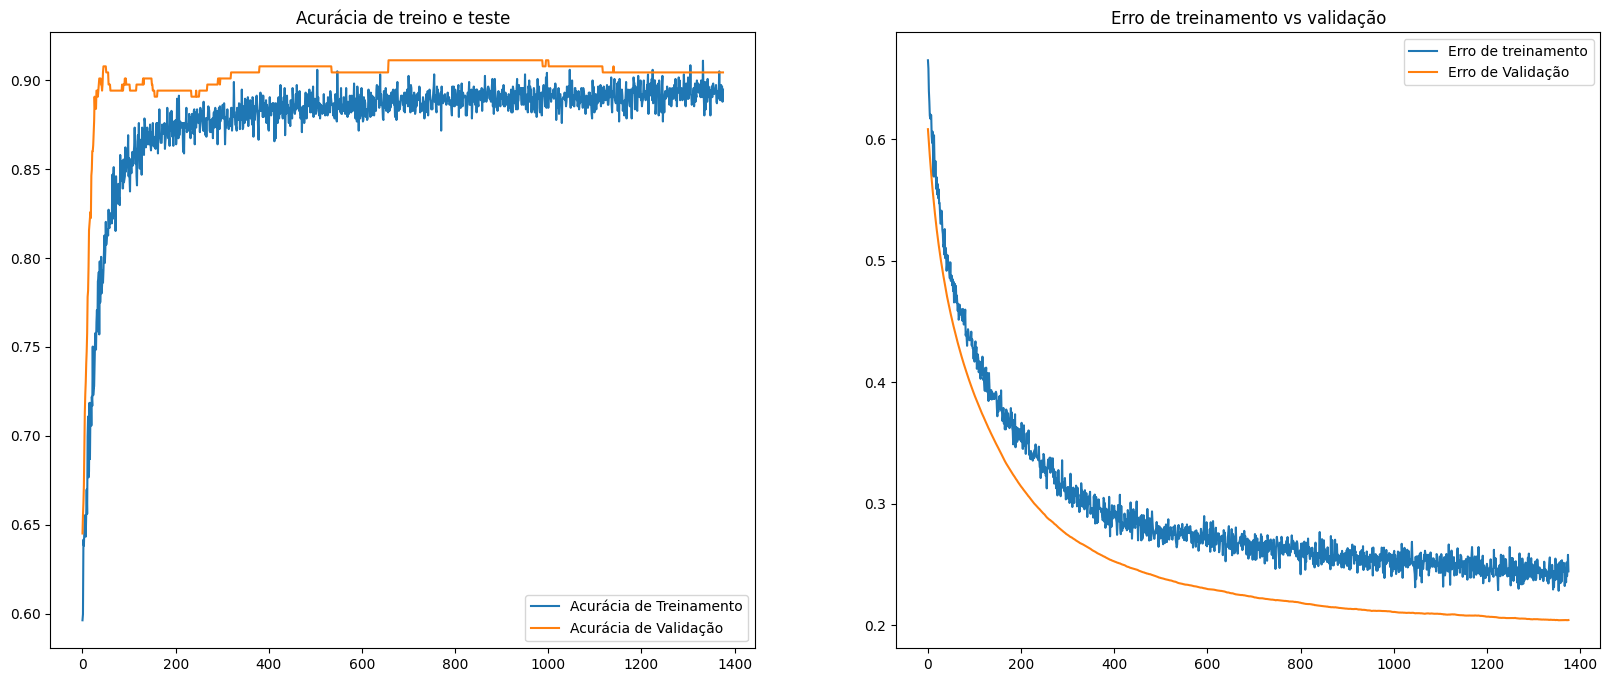

In [437]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Use the length of the training history to set the range
epochs_range = range(len(train_acc))

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()


### Model Evaluation

In [438]:
df_awarded_scholarship

,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,INDICADO_BOLSA
0,10.00002,7.581705,7.500,8.816667,5.625000,7.916665,5.0,7.675509,1
1,10.00002,8.071429,7.500,5.083333,6.250000,8.055553,5.0,7.117065,0
2,6.41668,8.557505,7.500,7.083333,6.458333,7.833337,5.0,7.232336,0
3,9.00002,9.333333,7.500,5.500000,6.250000,7.500000,10.0,7.741669,0
4,10.00002,9.314954,7.500,5.583333,5.937500,7.916670,5.0,7.406743,0
...,...,...,...,...,...,...,...,...,...
857,7.91668,9.666667,7.500,7.750000,6.250000,7.500000,10.0,8.150001,0
858,7.41668,6.470435,6.250,2.000000,6.250000,7.444443,5.0,5.674644,0
859,9.00002,9.031839,7.500,9.000000,5.625000,9.083340,5.0,8.135538,0
860,8.33334,9.178030,5.625,5.900000,6.718750,5.833328,5.0,6.749981,0


In [445]:
scaler.feature_names_in_

array(['IAA', 'IAN', 'IDA', 'IEG', 'INDE', 'IPP', 'IPS', 'IPV'],
      dtype=object)

In [446]:
# Create mock data
mock_data = pd.DataFrame({
    'IAA': [10.0],
    'IEG': [10.0],
    'IDA': [10.0],
    'IPS': [10.0],
    'IPP': [10.0],
    'IPV': [10.0],
    'IAN': [10.0],
    'INDE': [10.0]
})

# Ensure the mock data columns match the original data used to fit the scaler
mock_data = mock_data[scaler.feature_names_in_]

# Preprocess the mock data using the scaler
mock_data_scaled = scaler.transform(mock_data)
mock_data_scaled

array([[0.98713275, 1.45207872, 1.62990365, 1.13894872, 1.56701182,
        1.93714665, 1.61940831, 1.46328136]])

In [447]:
# Predict using the loaded model
mock_prediction = model.predict(mock_data_scaled)
mock_prediction.flatten().round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([1.], dtype=float32)

In [449]:
# Create mock data
mock_data = pd.DataFrame({
    'IAA': [10],
    'IEG': [9.16],
    'IPS': [7.50],
    'IDA': [8.89],
    'IPP': [8.12],
    'IPV': [8.21],
    'IAN': [8.0],
    'INDE': [8.95]
})

# Ensure the mock data columns match the original data used to fit the scaler
mock_data = mock_data[scaler.feature_names_in_]

# Preprocess the mock data using the scaler
mock_data_scaled = scaler.transform(mock_data)

# Predict using the loaded model
mock_prediction = model.predict(mock_data_scaled)

mock_prediction.flatten().round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([1.], dtype=float32)

In [452]:
# Create mock data
mock_data = pd.DataFrame({
    'IAA': [3],
    'IEG': [4.16],
    'IPS': [7.50],
    'IDA': [0.89],
    'IPP': [8.12],
    'IPV': [8.21],
    'IAN': [2.0],
    'INDE': [8.95]
})

# Ensure the mock data columns match the original data used to fit the scaler
mock_data = mock_data[scaler.feature_names_in_]

# Preprocess the mock data using the scaler
mock_data_scaled = scaler.transform(mock_data)

# Predict using the loaded model
mock_prediction = model.predict(mock_data_scaled)

mock_prediction.flatten().round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([0.], dtype=float32)

In [453]:
joblib.dump(scaler, 'model/awarded_scholarship_scaler.pkl')

# Save the model
model_filename = 'model/awarded_scholarship_model.pkl'
joblib.dump(model, model_filename)

['model/awarded_scholarship_model.pkl']